In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\Sharan\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# To partition the data
from sklearn.model_selection import train_test_split

In [3]:
# Importing library for logistic regression
from sklearn.linear_model import LogisticRegression

In [4]:
# Importing Performance metrics - accuracy score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix

In [10]:
# Importing the data
data_income = pd.read_csv(r'C:\Users\Sharan\Desktop\Github\income(1).csv')

In [11]:
# Create a copy
data = data_income.copy()

<b>1) Getting to know the data<br>
2) Data preprocessing (Missing Values)<br>
3) Cross tables and data visualization<br>


In [12]:
data.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [13]:
#STEP 1.
print(data.info())
# It is found that data types of columns are satisfactory(expected data_types)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 2.1+ MB
None


In [14]:
data.isnull().sum()
# No missing values!!

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [15]:
# Let us look at descriptive statistics of the numerical data.
summary_num = data.describe()
print(summary_num)

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [16]:
## Summary of categorical Variables
summary_cate = data.describe(include="O")
print(summary_cate)

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [17]:
# frequency of each category
data['JobType'].value_counts()
# '?' (missing values) exists

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [18]:
data['occupation'].value_counts()
# '?' (missing values) exists

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [19]:
# Checking for unique classes
print(np.unique(data['JobType']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']


In [20]:
print(np.unique(data['occupation']))

[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [22]:
# Consider the dataframe again with '?' as nan values
data = pd.read_csv(r'C:\Users\Sharan\Desktop\Github\income(1).csv',na_values=[" ?"])

In [23]:
# Data pre-processing
data.isnull().sum()
# Two columns have missing values

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [24]:
missing = data[data.isnull().any(axis=1)]
missing
# axis=1 to consider at least one column value is missing ( Sub-setting the dataFrame).

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [25]:
# Check shape of DataFrame that is a sub-set
missing.shape

(1816, 13)

In [26]:
# Drop records with null values
data2 = data.dropna(axis=0)

In [27]:
# Relationship between independent variables using correlation (Numerical Variables)
correlation = data2.corr()

In [28]:
correlation
# Closer the correlation value is to 1, stronger the relationship between the two variables.
# Here, none of the values have corr values near 1.

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [29]:
# Cross tables and Data Visualization

In [30]:
# List of columns of data frame
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [31]:
# Gender Proportion Table
gender = pd.crosstab(index = data2['gender'],
                    columns='count',
                    normalize = True)

In [32]:
gender # Percentage returned

col_0,count
gender,
Female,0.324315
Male,0.675685


In [33]:
# Gender vs Salary Status:

In [34]:
gender_salstat = pd.crosstab( index = data2['gender'],
                            columns = data2['SalStat'],
                            margins = True,
                            normalize = 'index')

In [35]:
gender_salstat
#Hence from o/p it is clear that percentage of males earning more than 50,000 dollars is higher than that of females.

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


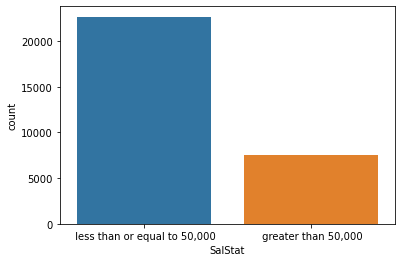

In [36]:
# fREQUENCy distribution of 'Salary Status'
Salstat = sns.countplot(data2['SalStat'])

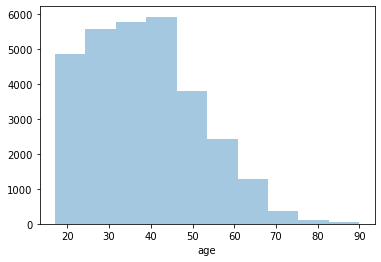

In [37]:
# Histogram of Age
sns.distplot(data2['age'], bins=10, kde=False)
# To get frequency values kde to be set to False.
# people with age 20-45 are high in frequency as interpretable from the hist...

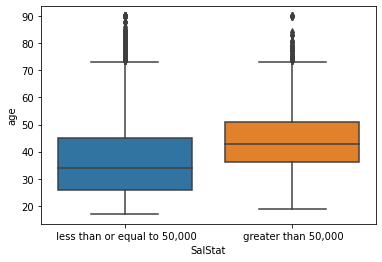

In [38]:
# Box Plot - Age vs salary Status
sns.boxplot('SalStat','age',data=data2)
#data2.groupby('SalStat')['age'].median()

SalStat
 greater than 50,000             43
 less than or equal to 50,000    34
Name: age, dtype: int64

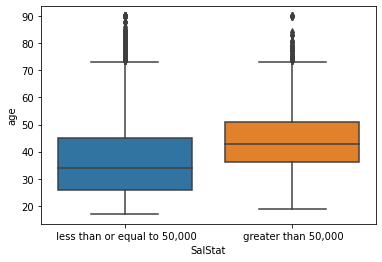

In [39]:
sns.boxplot('SalStat','age',data=data2)
data2.groupby('SalStat')['age'].median()

In [40]:
## People with 35-50 age are more likely to earn > 50000 Us Dollars
## People with 25-35 age are more likely to earn < 50000 Us Dollars

In [41]:
# JOB TYPE VS SALARY STATUS using cross table
jobtype_salstat = pd.crosstab( index = data2['JobType'],
                            columns = data2['SalStat'],
                            margins = True,
                            normalize = 'index')

In [42]:
# In terms of Percentage
jobtype_salstat * 100

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,38.706257,61.293743
Local-gov,29.462990,70.537010
Private,21.879207,78.120793
Self-emp-inc,55.865922,44.134078
Self-emp-not-inc,28.571429,71.428571
State-gov,26.896013,73.103987
Without-pay,0.000000,100.000000
All,24.892249,75.107751


In [43]:
# IMPORTANT RELATION TO NOTICE:
# 56% SELF EMPLOYED PEOPLE EARN MORE THAN 50,000 USD PER YEAR.
# HENCE AN IMPORTNAT VARIABLE IN AVOIDING THE MISUSE OF SUBSIDIES.

In [44]:
# EdType VS SALARY STATUS using cross table
edtype_salstat = pd.crosstab( index = data2['EdType'],
                            columns = data2['SalStat'],
                            margins = True,
                            normalize = 'index')

In [45]:
edtype_salstat *100

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,7.195122,92.804878
11th,5.629771,94.370229
12th,7.692308,92.307692
1st-4th,3.973510,96.026490
5th-6th,4.166667,95.833333
7th-8th,6.283662,93.716338
9th,5.494505,94.505495
Assoc-acdm,25.396825,74.603175
Assoc-voc,26.319816,73.680184


In [46]:
# From the above tale we can see that people who have done Doctorate, Masters, Prof-School are more likely to earn
# above 50000 USD per year when compared with others. Hence an influencing variable in avoiding the misuse of subsidies.

In [47]:
# occupation VS SALARY STATUS using cross table
occupation_salstat = pd.crosstab( index = data2['occupation'],
                            columns = data2['SalStat'],
                            margins = True,
                            normalize = 'index')

In [48]:
occupation_salstat * 100

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,13.383499,86.616501
Armed-Forces,11.111111,88.888889
Craft-repair,22.531017,77.468983
Exec-managerial,48.522044,51.477956
Farming-fishing,11.627907,88.372093
Handlers-cleaners,6.148148,93.851852
Machine-op-inspct,12.461851,87.538149
Other-service,4.109589,95.890411
Priv-house-serv,0.699301,99.300699


In [49]:
# From above table, records to watch out for are managers and professionals.

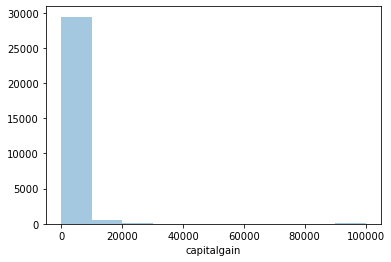

In [50]:
sns.distplot(data2['capitalgain'], bins=10, kde=False)
# 92% (27611) of the capitalgain is 0.

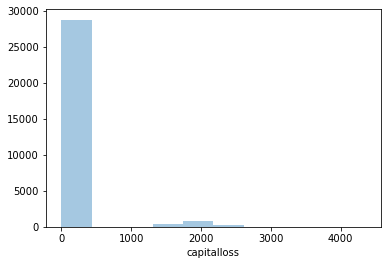

In [51]:
sns.distplot(data2['capitalloss'], bins=10, kde=False)
# 95% capital loss is 0


SalStat
 greater than 50,000             40
 less than or equal to 50,000    40
Name: hoursperweek, dtype: int64

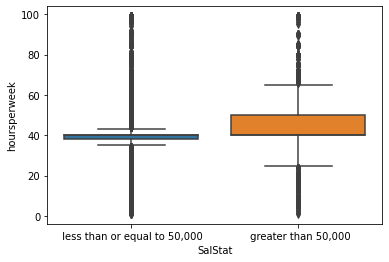

In [52]:
sns.boxplot('SalStat','hoursperweek',data=data2)
data2.groupby('SalStat')['hoursperweek'].median()
# From the plot, those who work 40-50 hours per week are likely to earn > 50000 USD.

In [53]:
# Summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        30169 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 2.1+ MB


In [54]:
hoursperweek_salstat = pd.crosstab( index = data2['hoursperweek'],
                            columns = data2['SalStat'],
                            margins = True,
                            normalize = 'index')
(hoursperweek_salstat * 100).head(10)

SalStat,"greater than 50,000","less than or equal to 50,000"
hoursperweek,,
1,14.285714,85.714286
2,13.333333,86.666667
3,4.166667,95.833333
4,7.407407,92.592593
5,15.789474,84.210526
6,10.000000,90.000000
7,10.526316,89.473684
8,5.882353,94.117647
9,5.882353,94.117647


In [55]:
print(np.unique(data['SalStat']))

[' greater than 50,000' ' less than or equal to 50,000']


# LOGISTIC REGRESSION

In [56]:
# Machine learning algorithms cannot work with categorical variables. 
# Hence, let us reindex the salary status names to 0,1

In [57]:
data2['SalStat'] = data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
#print(data2['SalStat'])
data2
# This method is called as Intger Encoding. It will later be used to get the labels at the end.

C:\Users\Sharan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,0
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,0
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,0
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,0


In [89]:
data2['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [81]:
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [58]:
# One hot encoding
# It refers to splitting the column which has categorical data to many columns depending on the number of categories
# present in the column.
new_data = pd.get_dummies(data2, drop_first=True)

In [59]:
#Storing the columns
columns_list = list(new_data.columns)
print(columns_list)
#We get this many columns because one-hot encoding dvides each column sub-typee into a separate column.

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [60]:
#Separating the input names from data
features= list(set(columns_list)-set(['SalStat']))
features

['race_ Other',
 'occupation_ Farming-fishing',
 'EdType_ 1st-4th',
 'relationship_ Other-relative',
 'EdType_ 11th',
 'nativecountry_ Holand-Netherlands',
 'occupation_ Protective-serv',
 'nativecountry_ Cuba',
 'nativecountry_ South',
 'nativecountry_ Germany',
 'maritalstatus_ Never-married',
 'race_ White',
 'nativecountry_ Japan',
 'JobType_ Without-pay',
 'EdType_ 12th',
 'JobType_ State-gov',
 'occupation_ Craft-repair',
 'EdType_ Some-college',
 'nativecountry_ China',
 'nativecountry_ Haiti',
 'EdType_ Assoc-voc',
 'JobType_ Local-gov',
 'JobType_ Private',
 'EdType_ 5th-6th',
 'maritalstatus_ Widowed',
 'maritalstatus_ Married-spouse-absent',
 'occupation_ Prof-specialty',
 'EdType_ Prof-school',
 'nativecountry_ Greece',
 'nativecountry_ Philippines',
 'occupation_ Priv-house-serv',
 'maritalstatus_ Married-AF-spouse',
 'nativecountry_ Thailand',
 'nativecountry_ Trinadad&Tobago',
 'hoursperweek',
 'nativecountry_ Ireland',
 'nativecountry_ Iran',
 'nativecountry_ United-Sta

In [61]:
'SalStat' in features

False

In [62]:
# Storing the output values in y
y = new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [84]:
model_columns = new_data[features].columns
pickle.dump(model_columns, open('model_columns.pkl','wb'))

In [83]:
new_data[features].head()

,race_ Other,occupation_ Farming-fishing,EdType_ 1st-4th,relationship_ Other-relative,EdType_ 11th,nativecountry_ Holand-Netherlands,occupation_ Protective-serv,nativecountry_ Cuba,nativecountry_ South,nativecountry_ Germany,...,nativecountry_ Mexico,nativecountry_ India,nativecountry_ Hungary,EdType_ Bachelors,nativecountry_ Laos,nativecountry_ Honduras,relationship_ Wife,occupation_ Machine-op-inspct,nativecountry_ Dominican-Republic,EdType_ Preschool
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# Storing the values from input features
x = new_data[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [64]:
x.shape

(30162, 94)

In [65]:
# Splitting the data into train and test
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3, random_state=0)
# test_size represents the proportion of the data set to include in the test split.
# random_state is the seed used by the random number generator, so that same samples are chosen for the analysis each time
# you run this code.

In [66]:
train_x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [67]:
# Make an instance of the model
logistic = LogisticRegression()

In [69]:
# Fitting for the values of x and y
logistic.fit(train_x,train_y)
logistic.coef_

C:\Users\Sharan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[-4.35739530e-01, -1.09221928e+00, -3.49800772e-01,
        -7.98078969e-01, -8.78478857e-01, -2.66351394e-03,
         3.62346449e-01, -3.44610779e-02, -1.99194985e-01,
         9.01812441e-02, -7.38971967e-01, -5.15300516e-01,
         6.28546258e-04, -4.72258582e-02, -3.56473465e-01,
        -7.12836253e-01, -1.04728817e-01, -7.78085107e-02,
        -1.90393269e-01, -4.42258233e-02,  2.37917238e-02,
        -7.44661270e-01, -5.31287724e-01, -6.19145629e-01,
        -1.74653392e-01, -1.39023422e-01,  5.21999681e-01,
         1.04086322e+00, -7.41140682e-02,  3.51869268e-02,
        -1.73797155e-01,  1.37451432e-01, -2.37173557e-02,
        -9.24689028e-03,  2.49812023e-02, -9.92586395e-03,
        -3.12487026e-02,  1.18474774e-02, -3.83852349e-01,
         1.92485236e-02, -6.86114138e-01, -3.00450061e-02,
        -1.81813070e-01, -2.65421104e-01,  3.07241830e-02,
        -5.04624974e-02,  9.45173541e-04, -9.53350575e-02,
         1.13941690e+00, -2.34635205e-02, -9.53440241e-0

In [70]:
logistic.intercept_

array([-2.8386782])

In [71]:
# Prediction from test data
prediction = logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [72]:
# Model to be evaluated using confusion matrix.
# Confusion matrix is a table that is used to evaluate the performance of a classification model.
# The confusion matrix output gives you the number of correct predictions and the number of incorrect predictions.
# and it will sum up all the values class wise.

In [73]:
# Confusion matrix
confusion_matrix = confusion_matrix(test_y,prediction)
print(confusion_matrix)

[[6338  485]
 [ 941 1285]]


In [74]:
# The diagonal values gives you the total number of correctly classified samples 
# and the off-diagonal values gives you the total number of wrongly classified samples.

In [75]:
# INTERPRETATION OF CONFUSION MATRIX
#[[6332 491]
#   925 1301]]
# The model has predicted 6332 observations as less than or equal to 50000.(For actual class <=50 )
# But being less than or equal to 50000 is the actual class, the model has predicted 491 observations as > 50000.
# Similarly given the actual salary status is greater than given 50000, the model has predicted 1301 observations
# as >50000 and 925 observations as <=50000. So there are many mis-calculations.

In [76]:
# Calculating the accuracy
accuracy_score = accuracy_score(test_y,prediction)
print(accuracy_score)

0.8424135263565035


In [77]:
# Printing the misclassified values from prediction
print('Misclassified samples: %d'% (test_y != prediction).sum())

Misclassified samples: 1426


In [78]:
import pickle
pickle.dump(logistic, open('model.pkl','wb'))

# KNN - K Nearest Neighbors

In [532]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [533]:
# Storing the K nearest neighbors classifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 5)

In [534]:
# Fitting the values for x an y
KNN_classifier.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [535]:
# Predicting the test values with model.
prediction = KNN_classifier.predict(test_x)

In [536]:
# Performance metric check
confusion_matrix = confusion_matrix(test_y, prediction)
print("\t","Predicted values")
print("Original values","\n",confusion_matrix)

	 Predicted values
Original values 
 [[6178  645]
 [ 810 1416]]


In [537]:
# Calculating the accuracy
accuracy_score = accuracy_score(test_y, prediction)
print(accuracy_score)

0.8392087523483258


In [538]:
print('Misclassified samples: %d' % (test_y != prediction).sum())

Misclassified samples: 1455


In [539]:
# Effect of K value on classifier

In [542]:
Misclassified_sample = []
# Calculating error for K values between 1 and 20
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    pred_i = knn.predict(test_x)
    Misclassified_sample.append((test_y != pred_i).sum())
print(Misclassified_sample)    

[1767, 1509, 1512, 1432, 1455, 1447, 1457, 1451, 1450, 1444, 1456, 1425, 1447, 1405, 1435, 1405, 1426, 1414, 1444]


In [545]:
min(Misclassified_sample)

1405

In [546]:
Misclassified_sample.index(1405)

13

#### Hence, k=14 will give the best results. Better than the k=5 which we have set.

<h1><b><i> API 

In [86]:
from flask import Flask,jsonify,request

In [94]:
import requests

In [91]:
# Testing API
# local url
import json
url = 'http://127.0.0.1:5000'

data = {
    'age':21,
    'JobType':'Private',
    'EdType':'HS-grad',
    'maritalstatus':'Never-married',
    'occupation':'Prof-specialty',
    'relationship':'Own-child',
    'race':'White',
    'gender':'Female',
    'capitalgain':0,
    'capitalloss':0,
    'hoursperweek':28,
    'nativecountry':'United-States'
    
}
data = json.dumps(data)

In [95]:
send_request =requests.post(url,data)
print(send_request.json())

{'results': {'results': 0}}


# After Deploying

In [101]:
url = 'https://income-classification-model.herokuapp.com/'
data = {
    'age':21,
    'JobType':'Private',
    'EdType':'HS-grad',
    'maritalstatus':'Never-married',
    'occupation':'Prof-specialty',
    'relationship':'Own-child',
    'race':'White',
    'gender':'Female',
    'capitalgain':0,
    'capitalloss':0,
    'hoursperweek':28,
    'nativecountry':'United-States'
    
}
data = json.dumps(data)

In [102]:
send_request =requests.post(url,data)

In [103]:
send_request.status_code

503

In [ ]:
print(send_request.json())